# Total Experience, Team Lead Experience, Project Manager Experience, Certifications vs Salary (Gradient Descent for Multiple Regression with Vectorization)

First of all, we are going to import the necessary libraries:

- Pandas: to handle and manipulate the dataset.
- NumPy: to perform numerical operations and array manipulations.
- Matplotlib: to visualize the data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We will load the insurance dataset ([link](https://www.kaggle.com/datasets/atharav3102/salary-dataset-for-multiple-linear-regression/data)) from a CSV file and visualize head.

In [4]:
df = pd.read_csv("../../datasets/SalaryMulti.csv")
df.head()

,Total Experience,Team Lead Experience,Project Manager Experience,Certifications,Salary
0,7,2,4,1,77318.070547
1,4,0,2,3,64951.950980
2,13,4,8,3,106058.185204
3,11,3,2,1,89649.944851
4,8,1,6,3,82206.019687


As we can see, the dataset contains six features: age, sex, bmi, children, smoker, and region, but only two of them, age and bmi, are numerical.<br>
We can visualize it individual

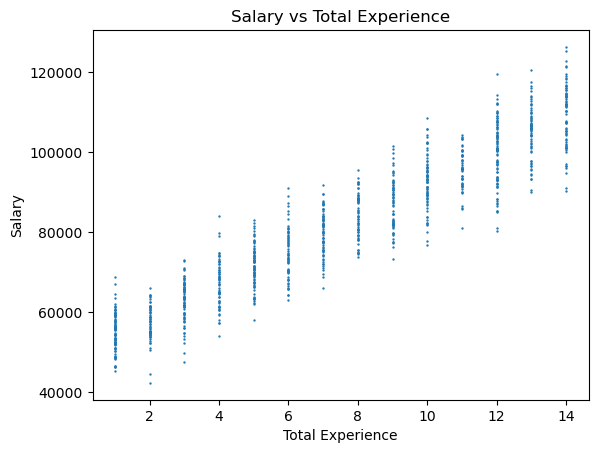

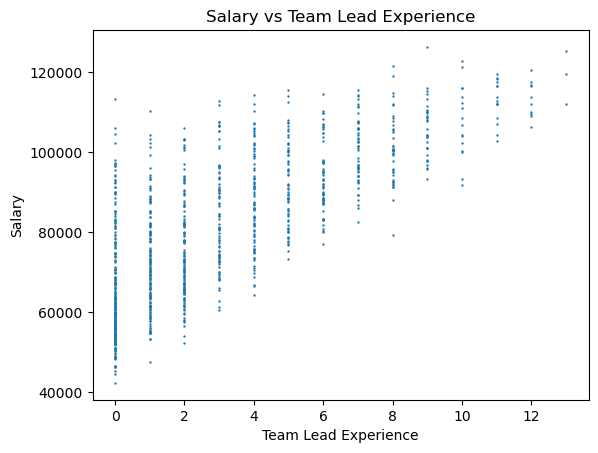

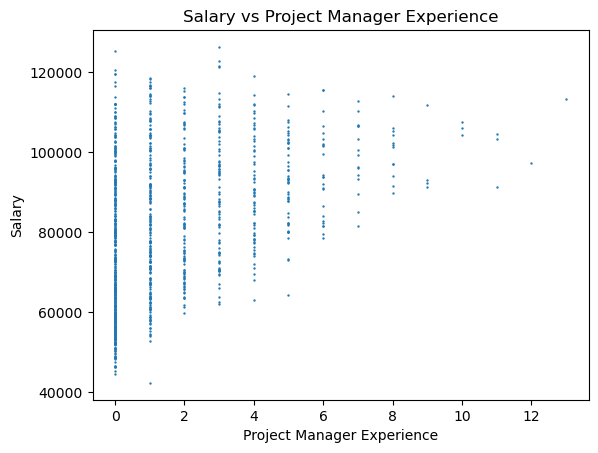

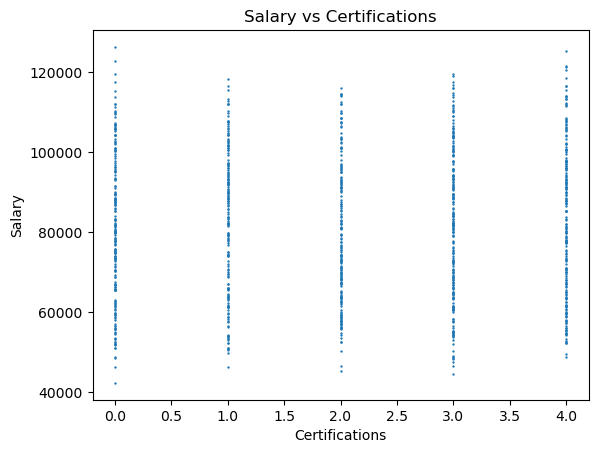

In [80]:
for feature in df.drop(columns="Salary"):
    plt.figure()
    plt.scatter(df[feature], df["Salary"], s=.5)
    plt.xlabel(feature)
    plt.ylabel("Salary")
    plt.title(f"Salary vs {feature}")
    plt.show()

We define the feature matrix using these variables and set charges as the target variable.

In [12]:
X_train = df.drop(columns=["Salary"]).to_numpy()
y_train = df["Salary"].to_numpy()

Now we are going to  define the cost function

In [13]:
#Function to calculate the cost
def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost += (f_wb_i - y[i])**2
    cost /= 2 * m
    return cost

Same for the gradient function

In [14]:
def compute_gradient(X, y, w, b):

    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Data, m examples 
      y (ndarray): target values
      w, b (scalar) : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    
    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] += err * X[i, j]
        dj_db += err
    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db    

Lastly we define the gradient descent

In [16]:
import copy
import math

def gradient_descent(X, y, w_in, b_in, alpha, cost_function, gradient_function, num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      alpha (float)       : Learning rate
      gradient_function   : function to compute the gradient
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw,dj_db = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [39]:
# initialize parameters
initial_w = np.zeros(X_train[0].shape)
initial_b = 0.
# some gradient descent settings
iterations = 3000
alpha = 2.1e-2
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    alpha, compute_cost, 
                                                    compute_gradient, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

Iteration    0: Cost 3420793216.11   
Iteration  300: Cost 86603347.38   
Iteration  600: Cost 17093864.02   
Iteration  900: Cost 12673613.19   
Iteration 1200: Cost 12071701.91   
Iteration 1500: Cost 11977930.95   
Iteration 1800: Cost 11963119.54   
Iteration 2100: Cost 11960776.99   
Iteration 2400: Cost 11960406.44   
Iteration 2700: Cost 11960347.83   
b,w found by gradient descent: 50629.34,[2989.59331898 1911.68988664  989.51867632  390.67386115] 


By looking at the weights, we can conclude that the features, ranked from most important to least important, are: Total Experience, Team Lead Experience, Project Manager Experience, and Certifications. <br>
Finally, we can see the mean error of the model and test.

In [74]:
# example shape
m = 10
for i in range(m):
    prediction = np.dot(X_train[i], w_final) + b_final
    deviation = math.fabs(y_train[i] - prediction)
    print(f"prediction: {prediction:0.2f}, target value: {y_train[i]:0.2f}, Deviation: {deviation:0.2f}")

predictions = X_train.dot(w_final) + b_final
mean_deviation = np.mean(np.abs(y_train - predictions))
mean_salary = np.mean(y_train)
print(f"Mean deviation: {mean_deviation:0.2f}")
print(f"Mean error: {(mean_deviation / mean_salary * 100):0.2f}%")

prediction: 79728.62, target value: 77318.07, Deviation: 2410.55
prediction: 65738.77, target value: 64951.95, Deviation: 786.82
prediction: 106228.98, target value: 106058.19, Deviation: 170.80
prediction: 91619.64, target value: 89649.94, Deviation: 1969.70
prediction: 83566.91, target value: 82206.02, Deviation: 1360.89
prediction: 105428.09, target value: 113993.24, Deviation: 8565.14
prediction: 68129.52, target value: 70804.60, Deviation: 2675.08
prediction: 77009.91, target value: 75522.60, Deviation: 1487.31
prediction: 84483.34, target value: 87484.77, Deviation: 3001.43
prediction: 60978.31, target value: 58830.90, Deviation: 2147.41
Mean deviation: 3915.10
Mean error: 4.81%


In [76]:
test = np.array([0, 0, 0, 2])
print(f"prediction: {np.dot(test, w_final) + b_final:0.2f}")

prediction: 51410.68
